# Klasifikátory a analýza pohybu

Několik typů klasifikátorů:

* Nejbližší soused (KNN)
* Bayessův klasifikátor 
* Support Vector Machine (SVM)

Dva základní typy učení:

* S učitelem (Supervised learning)
* Bez učitele (Unsupervised learning)
    

## Klasifikátory v Pythonu

Dobrým pomocníkem je balík [scikits-learn (sklearn)](http://scikit-learn.org/dev/user_guide.html).

In [1]:
%pylab inline --no-import-all
from sklearn import datasets
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Načtení trénovacích dat. Jde o kosatec (iris flower) a jeho tři poddruhy: Iris setosa, 
Iris versicolor, Iris virginica. Měří se délka kalichu, šířka kalichu, délka okvětního lístku a šířka okvětního lístku.

![iris](http://scipy-lectures.github.io/_images/Virginia_Iris.png)

In [8]:
iris = datasets.load_iris()
# cílové třídy
print np.unique(iris.target)
# rozměry dat
print iris.data.shape

print iris.data[-10:,:]

# print iris.target

[0 1 2]
(150, 4)
[[ 6.7  3.1  5.6  2.4]
 [ 6.9  3.1  5.1  2.3]
 [ 5.8  2.7  5.1  1.9]
 [ 6.8  3.2  5.9  2.3]
 [ 6.7  3.3  5.7  2.5]
 [ 6.7  3.   5.2  2.3]
 [ 6.3  2.5  5.   1.9]
 [ 6.5  3.   5.2  2. ]
 [ 6.2  3.4  5.4  2.3]
 [ 5.9  3.   5.1  1.8]]


## Klasifikátor podle K-nejbližšího souseda

Nejbližší soused
![NN](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/5.jpg)

K - nejbližší soused
![KNN](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/6.jpg)

Počítání minimální vzdálenosti
![minimální vzdálenost](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/7.jpg)


In [3]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target) 
#KNeighborsClassifier(...)
predikce = knn.predict([[0.1, 0.2, 0.3, 0.4]])
print predikce
#array([0])

[0]


![knn_classif](http://scipy-lectures.github.io/_images/iris_knn.png)

## Trénovací a testovací sada

Při experimentování je důležité rozdělit data na trénovací a testovací sadu. 

In [4]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]

train_data = iris.data[:100]
train_target = iris.target[:100]

test_data = iris.data[100:]
test_target = iris.target[100:]

knn.fit(train_data, train_target) 

knn.score(test_data, test_target) 

/usr/lib/pymodules/python2.7/sklearn/neighbors/base.py:23: UserWarning: kneighbors: neighbor k+1 and neighbor k have the same distance: results will be dependent on data order.
  warnings.warn(msg)


0.97999999999999998

## Bayessův klasifikátor

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{ (x_i - \mu_y)^2}{2\pi\sigma^2_y}\right)$$

In [5]:
import sklearn.naive_bayes
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(train_data, train_target)
y_pred = gnb.predict(test_data)
print("Number of mislabeled points : %d" % (test_target != y_pred).sum())

Number of mislabeled points : 2


## SVM klasifikátor

Rozděluje data nadrovinou

![svm](http://scipy-lectures.github.io/_images/svm_margin.png)

In [6]:
from sklearn import svm
svc = svm.SVC()
svc.fit(train_data, train_target) 
y_pred = svc.predict(test_data)
print("Number of mislabeled points : %d" % (test_target != y_pred).sum())

Number of mislabeled points : 0


/usr/lib/pymodules/python2.7/sklearn/svm/classes.py:184: FutureWarning: SVM: scale_C will be True by default in scikit-learn 0.11
  cache_size, scale_C)


## Učení bez učitele

Cílem je rodělit obrazy bez další informace do skupin - shluků

Vstup
![bez ucitele vstup](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/2.jpg)

výstup
![kmeans výstup](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/3.jpg)

Pro jednoduché případy lze použít algoritmus K-Means. Pro složitější natrénování Bayessova klasifikátoru je využíván EM-algoritmus.

## příklad z kamery

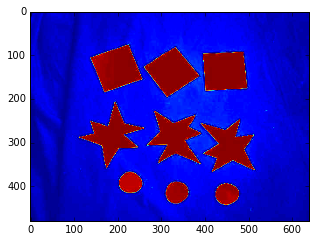

[-1  0  1  2  3  4  5  6  7  8]


[[374.53405460951763, 7824.0],
 [355.52900397563428, 7538.0],
 [356.42640687119285, 7883.0],
 [562.90158697766469, 6992.0],
 [564.8843430349616, 7002.0],
 [557.12698372208092, 6975.0],
 [163.4386001800126, 1969.0],
 [166.02438661763949, 2023.0],
 [167.4386001800126, 2056.0]]

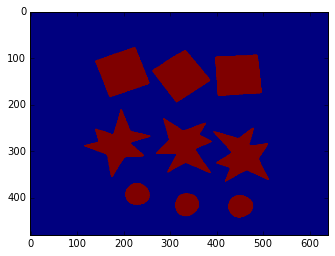

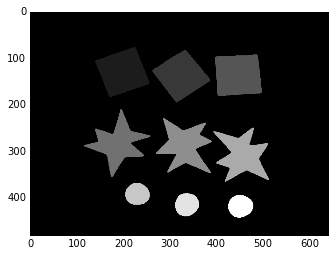

In [46]:
import scipy
import urllib
import cStringIO
import skimage
import skimage.color
import skimage.filter
import skimage.measure
from sklearn import svm


# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/ctverce_hvezdy_kolecka.jpg"




In [48]:
# testujeme
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/15.jpg"



file = cStringIO.StringIO(urllib.urlopen(URL).read())

im = scipy.misc.imread(file)
img = skimage.color.rgb2gray(im)


#filtered
img = skimage.filter.gaussian_filter(img, 2)
thr = skimage.filter.threshold_otsu(img)
imthr = img > thr
imlab = skimage.measure.label(imthr, background=0)

print np.unique(imlab)
props = skimage.measure.regionprops(imlab + 1)

test_data = []
for pr in props:
    
    test_data.append(
        [pr.perimeter, pr.area]
    )
y_pred = svc.predict(test_data)
print "predikce ", y_pred
test_data

[-1  0  1  2]
predikce  [0 2 2]


[[373.20310216782974, 7889.0],
 [553.73001410241091, 6896.0],
 [165.19595949289334, 2021.0]]

# Analýza pohybu

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/12.jpg)
![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/11.jpg)

rozdílový obraz

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/9.jpg)

kumulativní obraz

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/10.jpg)


Klíčové body

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/8.jpg)




## Tracking

* detekce
* sledování

http://openeuroscience.com/software/computer-vision-and-motion-tracking-software/